## sql_project

## rentalshop 전처리

In [2]:
import pandas as pd
import numpy as np

In [9]:
# 대여소 정보 읽기
rentalshop = pd.read_csv('C:/Users/pc/Desktop/sql_project/공공자전거 대여소 정보(21.01.31 기준).csv', 
encoding='cp949', header= 4 )
rentalshop.head(10)



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD
5,306.0,광화문역 7번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.570808,126.976433,2015-10-07,19.0,NaN,LCD
6,307.0,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55,37.570000,126.971100,2015-10-07,11.0,NaN,LCD
7,308.0,광화문 S타워 앞,종로구,서울특별시 종로구 새문안로 82,37.569969,126.973938,2021-01-26,NaN,20.0,QR
8,309.0,광화문역 6번출구 옆,종로구,서울특별시 종로구 세종대로 지하172,37.569889,126.976456,2015-10-07,13.0,NaN,LCD
9,314.0,국립현대미술관,종로구,서울특별시 종로구 삼청로 30,37.579708,126.980858,2015-10-07,10.0,NaN,LCD


In [10]:
# 대여소 정보 열이름 정리
rentalshop.columns = ['shopnumber', 'shopname','gu','detailaddress', 'latitude','longtitude','builddate','lcd','qr','operationtype']
rentalshop.head()

,shopnumber,shopname,gu,detailaddress,latitude,longtitude,builddate,lcd,qr,operationtype
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [11]:
# 대여소 데이터프레임 정보 확인
rentalshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopnumber     2154 non-null   float64
 1   shopname       2154 non-null   object 
 2   gu             2154 non-null   object 
 3   detailaddress  2154 non-null   object 
 4   latitude       2042 non-null   float64
 5   longtitude     2042 non-null   float64
 6   builddate      2152 non-null   object 
 7   lcd            1482 non-null   float64
 8   qr             671 non-null    float64
 9   operationtype  2154 non-null   object 
dtypes: float64(5), object(5)
memory usage: 168.6+ KB


In [12]:
# 대여소 열별 결측치 확인
rentalshop.isna().sum()

shopnumber          3
shopname            3
gu                  3
detailaddress       3
latitude          115
longtitude        115
builddate           5
lcd               675
qr               1486
operationtype       3
dtype: int64

In [13]:
# shopname결측치 조회
rentalshop[rentalshop.shopname.isna()]

,shopnumber,shopname,gu,detailaddress,latitude,longtitude,builddate,lcd,qr,operationtype
2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# builddate결측치 조회
rentalshop[rentalshop.builddate.isna()]

,shopnumber,shopname,gu,detailaddress,latitude,longtitude,builddate,lcd,qr,operationtype
376,588.0,뚝섬 유원지역,광진구,서울특별시 광진구 능동로 10,37.532688,127.067497,NaN,NaN,20.0,QR
991,113.0,홍대입구역 2번출구 앞,마포구,서울특별시 마포구 양화로 165,37.557499,126.923805,NaN,NaN,NaN,QR
2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# shopnumber컬럼, builddate칼럼 결측치 삭제
rentalshop = rentalshop[rentalshop['shopnumber'].notnull()]
rentalshop = rentalshop[rentalshop['builddate'].notnull()]

rentalshop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2153
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopnumber     2152 non-null   float64
 1   shopname       2152 non-null   object 
 2   gu             2152 non-null   object 
 3   detailaddress  2152 non-null   object 
 4   latitude       2040 non-null   float64
 5   longtitude     2040 non-null   float64
 6   builddate      2152 non-null   object 
 7   lcd            1482 non-null   float64
 8   qr             670 non-null    float64
 9   operationtype  2152 non-null   object 
dtypes: float64(5), object(5)
memory usage: 184.9+ KB


In [14]:
# latitude 결측치 조회
rentalshop[rentalshop.latitude.isna()]

,shopnumber,shopname,gu,detailaddress,latitude,longtitude,builddate,lcd,qr,operationtype
65,486.0,평창동주민센터 앞,종로구,서울특별시 종로구 평창동 187-2,NaN,NaN,2020-03-11,5.0,NaN,LCD
79,3415.0,동대문역6번출구,종로구,창신동487-5,NaN,NaN,2020-02-26,NaN,15.0,QR
96,4702.0,"평창동 꽃여울(꽃집),스타벅스 앞",종로구,평창12길 3,NaN,NaN,2020-07-21,NaN,5.0,QR
97,4710.0,자교교회 앞,종로구,자하문로 58,NaN,NaN,2020-11-05,NaN,8.0,QR
98,4711.0,올림픽기념 국민생활관 로터리,종로구,종로구 혜화동 9-8,NaN,NaN,2020-09-10,NaN,10.0,QR
...,...,...,...,...,...,...,...,...,...,...
2068,2658.0,가락몰 업무동,송파구,가락동 600,NaN,NaN,2020-06-04,NaN,10.0,QR
2069,2659.0,서울친환경유통센터,송파구,가락동 600,NaN,NaN,2020-06-04,NaN,10.0,QR
2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# 위도,경도,lcd,qr칼럼 결측치 대체
new_data = {'longtitude': 0, 
            'latitude': 0, 
            'lcd': 0,
           'qr': 0
           }
rentalshop = rentalshop.fillna(new_data)

In [18]:
# 대여소 열별 결측치 확인
rentalshop.isna().sum()

shopnumber       0
shopname         0
gu               0
detailaddress    0
latitude         0
longtitude       0
builddate        0
lcd              0
qr               0
operationtype    0
dtype: int64

In [19]:
rentalshop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 2153
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopnumber     2152 non-null   float64
 1   shopname       2152 non-null   object 
 2   gu             2152 non-null   object 
 3   detailaddress  2152 non-null   object 
 4   latitude       2152 non-null   float64
 5   longtitude     2152 non-null   float64
 6   builddate      2152 non-null   object 
 7   lcd            2152 non-null   float64
 8   qr             2152 non-null   float64
 9   operationtype  2152 non-null   object 
dtypes: float64(5), object(5)
memory usage: 184.9+ KB


In [20]:
rentalshop.head(10)

,shopnumber,shopname,gu,detailaddress,latitude,longtitude,builddate,lcd,qr,operationtype
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,0.0,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,0.0,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,0.0,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,0.0,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,0.0,LCD
5,306.0,광화문역 7번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.570808,126.976433,2015-10-07,19.0,0.0,LCD
6,307.0,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55,37.570000,126.971100,2015-10-07,11.0,0.0,LCD
7,308.0,광화문 S타워 앞,종로구,서울특별시 종로구 새문안로 82,37.569969,126.973938,2021-01-26,0.0,20.0,QR
8,309.0,광화문역 6번출구 옆,종로구,서울특별시 종로구 세종대로 지하172,37.569889,126.976456,2015-10-07,13.0,0.0,LCD
9,314.0,국립현대미술관,종로구,서울특별시 종로구 삼청로 30,37.579708,126.980858,2015-10-07,10.0,0.0,LCD


In [21]:
# rds 테이블과 형태 맞춰주기 위해 형변환
rentalshop['shopnumber'] = rentalshop['shopnumber'].astype('int')
rentalshop['lcd'] = rentalshop['lcd'].astype('int')
rentalshop['qr'] = rentalshop['qr'].astype('int')

In [22]:
# rentalshop 데이터 csv 저장
rentalshop.to_csv('C:/Users/pc/Desktop/sql_project/rentalshop.csv', index=None)

In [163]:
# 대여소 정보 읽기
rentalshop = pd.read_csv('C:/Users/pc/Desktop/sql_project/rentalshop.csv', 
encoding='utf-8')
rentalshop.head(10)

,shopnumber,shopname,gu,detailaddress,latitude,longtitude,builddate,lcd,qr,operationtype
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,0,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,0,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,0,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,0,7,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,0,LCD
5,306,광화문역 7번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.570808,126.976433,2015-10-07,19,0,LCD
6,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55,37.570000,126.971100,2015-10-07,11,0,LCD
7,308,광화문 S타워 앞,종로구,서울특별시 종로구 새문안로 82,37.569969,126.973938,2021-01-26,0,20,QR
8,309,광화문역 6번출구 옆,종로구,서울특별시 종로구 세종대로 지하172,37.569889,126.976456,2015-10-07,13,0,LCD
9,314,국립현대미술관,종로구,서울특별시 종로구 삼청로 30,37.579708,126.980858,2015-10-07,10,0,LCD


## rentalbicycle 전처리

In [3]:
# 자전거 이용정보 2019.07-2019.11 읽기
rentalbicycle1 = pd.read_excel('C:/Users/pc/Desktop/sql_project/서울특별시 공공자전거 이용정보(월별)_201907_201911.xlsx')
rentalbicycle1.tail()

,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
336816,2019-11-01,9998,9998. 영남주차장 정비센터,정기,M,AGE_004,8,244.33,1.84,7910,86
336817,2019-11-01,99998,99998. 상암단말정비,정기,,AGE_005,2,0,0,0,0
336818,2019-11-01,99999,99999. 영남단말기정비,정기,,AGE_002,6,2110.9,11.24,48460,71
336819,2019-11-01,99999,99999. 영남단말기정비,정기,,AGE_004,10,1304.51,11.75,50680,161
336820,2019-11-01,99999,99999. 영남단말기정비,정기,M,AGE_004,17,2526.53,17.42,75060,601


In [82]:
rentalbicycle1.head(10)

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
0,2019-07-01,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210,87
1,2019-07-01,3,중랑센터,일일(회원),M,AGE_004,1,0,0,0,2
2,2019-07-01,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190,1329
3,2019-07-01,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370,155
4,2019-07-01,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.3,1280,6
5,2019-07-01,7,7.이동정비,정기,,AGE_001,2,59.74,0.7,3010,18
6,2019-07-01,7,7.이동정비,정기,,AGE_002,3,204.27,1.63,7040,35
7,2019-07-01,7,7.이동정비,정기,,AGE_003,1,357.01,3.22,13870,62
8,2019-07-01,7,7.이동정비,정기,,AGE_004,6,507.17,3.78,16280,101
9,2019-07-01,7,7.이동정비,정기,,AGE_005,1,20.79,0.17,750,5


In [23]:
# 자전거 이용정보 2019.07-2019.11 칼럼 정리
rentalbicycle1.columns = ['daten', 'shopnumber', 'shopname','divisioncode','sex', 'agecode','counting','excercise','carbon','distance','excercisetime']
rentalbicycle1.head()


,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
0,2019-07-01,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210,87
1,2019-07-01,3,중랑센터,일일(회원),M,AGE_004,1,0,0,0,2
2,2019-07-01,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190,1329
3,2019-07-01,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370,155
4,2019-07-01,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.3,1280,6


In [24]:
rentalbicycle1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336821 entries, 0 to 336820
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   daten          336821 non-null  datetime64[ns]
 1   shopnumber     336821 non-null  int64         
 2   shopname       336821 non-null  object        
 3   divisioncode   336821 non-null  object        
 4   sex            265889 non-null  object        
 5   agecode        336821 non-null  object        
 6   counting       336821 non-null  int64         
 7   excercise      336821 non-null  object        
 8   carbon         336821 non-null  object        
 9   distance       336821 non-null  int64         
 10  excercisetime  336821 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 28.3+ MB


In [25]:
# 자전거 이용정보 2019.12 읽기
rentalbicycle2 = pd.read_csv('C:/Users/pc/Desktop/sql_project/공공자전거 이용정보(월별)_19.12.csv', encoding = 'cp949')
rentalbicycle2.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Dec-19,3,중랑센터,일일(회원),M,AGE_003,7,1208.87,10.11,43610,118
1,Dec-19,3,중랑센터,일일(회원),M,AGE_004,2,0,0,0,10
2,Dec-19,3,중랑센터,정기,M,AGE_005,5,110.02,1.03,4410,99
3,Dec-19,5,상암센터 정비실,일일(회원),\N,AGE_005,1,0,0,0,8
4,Dec-19,5,상암센터 정비실,일일(회원),M,AGE_004,5,427.8,3.92,16880,205


In [26]:
# 자전거 이용정보 2019.12 칼럼 정리
rentalbicycle2.columns = ['daten', 'shopnumber', 'shopname','divisioncode','sex', 'agecode','counting','excercise','carbon','distance','excercisetime']
rentalbicycle2.head()

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
0,Dec-19,3,중랑센터,일일(회원),M,AGE_003,7,1208.87,10.11,43610,118
1,Dec-19,3,중랑센터,일일(회원),M,AGE_004,2,0,0,0,10
2,Dec-19,3,중랑센터,정기,M,AGE_005,5,110.02,1.03,4410,99
3,Dec-19,5,상암센터 정비실,일일(회원),\N,AGE_005,1,0,0,0,8
4,Dec-19,5,상암센터 정비실,일일(회원),M,AGE_004,5,427.8,3.92,16880,205


In [27]:
# 자전거 이용정보 2020.01-2020.05 읽기
rentalbicycle3 = pd.read_csv('C:/Users/pc/Desktop/sql_project/공공자전거 이용정보(월별)_20.01_20.05.csv', encoding = 'cp949')
rentalbicycle3.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Jan-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75
1,Jan-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15
2,Jan-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53
3,Jan-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.0,33
4,Jan-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.0,64


In [28]:
# 자전거 이용정보 2020.01-2020.05 칼럼 정리
rentalbicycle3.columns = ['daten', 'shopnumber', 'shopname','divisioncode','sex', 'agecode','counting','excercise','carbon','distance','excercisetime']
rentalbicycle3.head()

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
0,Jan-20,3,중랑센터,일일(회원),M,AGE_003,3,61.82,0.52,2230.0,75
1,Jan-20,3,중랑센터,일일(회원),M,AGE_004,1,39.62,0.28,1220.0,15
2,Jan-20,3,중랑센터,정기,M,AGE_005,3,430.85,4.01,17270.0,53
3,Jan-20,5,상암센터 정비실,일일(회원),\N,AGE_005,2,1.79,0.02,90.0,33
4,Jan-20,5,상암센터 정비실,정기,F,AGE_003,1,4501.96,45.47,196010.0,64


In [29]:
# 자전거 이용정보 2020.06 읽기
rentalbicycle4 = pd.read_csv('C:/Users/pc/Desktop/sql_project/공공자전거 이용정보(월별)_20.06.csv', encoding = 'cp949')
rentalbicycle4.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2020-06,5,상암센터 정비실,일일(회원),\N,AGE_005,5,28.51,0.33,1440.0,141
1,2020-06,5,상암센터 정비실,일일(회원),M,AGE_003,1,\N,\N,0.0,4
2,2020-06,5,상암센터 정비실,일일(회원),M,AGE_004,17,2908.72,26.63,114770.0,278
3,2020-06,5,상암센터 정비실,일일(회원),M,AGE_005,4,0.00,0.00,0.0,80
4,2020-06,5,상암센터 정비실,정기,\N,AGE_008,2,0.00,0.00,0.0,1


In [30]:
# 자전거 이용정보 2020.06 칼럼 정리
rentalbicycle4.columns = ['daten', 'shopnumber', 'shopname','divisioncode','sex', 'agecode','counting','excercise','carbon','distance','excercisetime']
rentalbicycle4.head()

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
0,2020-06,5,상암센터 정비실,일일(회원),\N,AGE_005,5,28.51,0.33,1440.0,141
1,2020-06,5,상암센터 정비실,일일(회원),M,AGE_003,1,\N,\N,0.0,4
2,2020-06,5,상암센터 정비실,일일(회원),M,AGE_004,17,2908.72,26.63,114770.0,278
3,2020-06,5,상암센터 정비실,일일(회원),M,AGE_005,4,0.00,0.00,0.0,80
4,2020-06,5,상암센터 정비실,정기,\N,AGE_008,2,0.00,0.00,0.0,1


In [104]:
# 이용정보 파일 4개 합치기
rentalbicycle = pd.concat([rentalbicycle1, rentalbicycle2, rentalbicycle3, rentalbicycle4], axis = 0)

In [105]:
rentalbicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807338 entries, 0 to 89480
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   daten          807338 non-null  object 
 1   shopnumber     807338 non-null  int64  
 2   shopname       807338 non-null  object 
 3   divisioncode   807338 non-null  object 
 4   sex            657970 non-null  object 
 5   agecode        807338 non-null  object 
 6   counting       807338 non-null  int64  
 7   excercise      807338 non-null  object 
 8   carbon         807338 non-null  object 
 9   distance       807338 non-null  float64
 10  excercisetime  807338 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 73.9+ MB


In [106]:
# rentalbicycle 열별 결측치개수 확인
rentalbicycle.isnull().sum()

daten                 0
shopnumber            0
shopname              0
divisioncode          0
sex              149368
agecode               0
counting              0
excercise             0
carbon                0
distance              0
excercisetime         0
dtype: int64

In [107]:
# sex열 결측치 조회
rentalbicycle[rentalbicycle.sex.isna()]

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
11,2019-07-01 00:00:00,7,7.이동정비,정기,NaN,AGE_001,1,45.82,0.41,1780.00,19
12,2019-07-01 00:00:00,7,7.이동정비,정기,NaN,AGE_002,1,40.03,0.31,1330.00,56
13,2019-07-01 00:00:00,7,7.이동정비,정기,NaN,AGE_005,1,72.23,0.53,2280.00,20
21,2019-07-01 00:00:00,101,101. (구)합정동 주민센터,단체,NaN,AGE_002,4,1178.17,9.89,42610.00,335
22,2019-07-01 00:00:00,101,101. (구)합정동 주민센터,단체,NaN,AGE_003,4,784.98,6.13,26430.00,246
...,...,...,...,...,...,...,...,...,...,...,...
89415,2020-06,3586,3586.군자역 비채온 오피스텔,정기,NaN,AGE_005,1,0.00,0.00,0.00,36
89439,2020-06,3587,3587.우성식품 앞,정기,NaN,AGE_002,1,0.00,0.00,0.00,8
89440,2020-06,3587,3587.우성식품 앞,정기,NaN,AGE_003,1,0.00,0.00,0.00,8
89451,2020-06,3588,3588.세종대학교(영실관),정기,NaN,AGE_002,1,35.58,0.29,1230.79,11


In [108]:
# sex열 결측치 아닌것 조회
rentalbicycle[rentalbicycle.sex.notnull()]

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
0,2019-07-01 00:00:00,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210.0,87
1,2019-07-01 00:00:00,3,중랑센터,일일(회원),M,AGE_004,1,0,0,0.0,2
2,2019-07-01 00:00:00,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190.0,1329
3,2019-07-01 00:00:00,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370.0,155
4,2019-07-01 00:00:00,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.3,1280.0,6
...,...,...,...,...,...,...,...,...,...,...,...
89476,2020-06,9999,시스템관리팀,정기,F,AGE_003,2,0.00,0.00,0.0,47
89477,2020-06,9999,시스템관리팀,정기,M,AGE_003,1,0.00,0.00,0.0,2
89478,2020-06,9999,시스템관리팀,정기,M,AGE_005,1,0.00,0.00,0.0,7
89479,2020-06,99998,99998. 상암단말정비,정기,\N,AGE_005,1,0.00,0.00,0.0,2


In [109]:
# shopnumber 비정상 적인것 확인
rentalbicycle[rentalbicycle.shopnumber > 5000]

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
65886,2019-07-01 00:00:00,9993,9993. 개화정비,일일(회원),M,AGE_004,1,44.84,0.35,1490.0,10
65887,2019-07-01 00:00:00,9993,9993. 개화정비,정기,,AGE_002,19,3567.18,25.04,107920.0,326
65888,2019-07-01 00:00:00,9993,9993. 개화정비,정기,,AGE_003,5,154.53,1.26,5420.0,27
65889,2019-07-01 00:00:00,9993,9993. 개화정비,정기,M,AGE_003,5,196.16,1.19,5160.0,37
65890,2019-07-01 00:00:00,9993,9993. 개화정비,정기,M,AGE_004,10,363.87,2.51,10810.0,296
...,...,...,...,...,...,...,...,...,...,...,...
89476,2020-06,9999,시스템관리팀,정기,F,AGE_003,2,0.00,0.00,0.0,47
89477,2020-06,9999,시스템관리팀,정기,M,AGE_003,1,0.00,0.00,0.0,2
89478,2020-06,9999,시스템관리팀,정기,M,AGE_005,1,0.00,0.00,0.0,7
89479,2020-06,99998,99998. 상암단말정비,정기,\N,AGE_005,1,0.00,0.00,0.0,2


In [110]:
# shopnumber 비정상 적인것 삭제
rentalbicycle = rentalbicycle[rentalbicycle.shopnumber < 5000]

In [111]:
rentalbicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807107 entries, 0 to 89456
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   daten          807107 non-null  object 
 1   shopnumber     807107 non-null  int64  
 2   shopname       807107 non-null  object 
 3   divisioncode   807107 non-null  object 
 4   sex            657747 non-null  object 
 5   agecode        807107 non-null  object 
 6   counting       807107 non-null  int64  
 7   excercise      807107 non-null  object 
 8   carbon         807107 non-null  object 
 9   distance       807107 non-null  float64
 10  excercisetime  807107 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 73.9+ MB


In [112]:
# 성별 결측치 삭제
rentalbicycle = rentalbicycle[rentalbicycle['sex'].notnull()]

In [113]:
rentalbicycle.isna().sum()

daten            0
shopnumber       0
shopname         0
divisioncode     0
sex              0
agecode          0
counting         0
excercise        0
carbon           0
distance         0
excercisetime    0
dtype: int64

In [114]:
rentalbicycle.sex.unique()

array(['M', ' ', 'F', 'f', 'm', '\\N'], dtype=object)

In [115]:
rentalbicycle.sex.value_counts()

M     200848
F     176449
\N    163818
      115903
m        414
f        315
Name: sex, dtype: int64

In [116]:
# 성별이 \N 인 값들 조회
rentalbicycle[rentalbicycle['sex'] == '\\N' ]

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
3,Dec-19,5,상암센터 정비실,일일(회원),\N,AGE_005,1,0,0,0.00,8
6,Dec-19,101,101. (구)합정동 주민센터,일일(비회원),\N,AGE_008,2,1083.14,9.76,42080.00,82
7,Dec-19,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_002,11,1001.83,8.81,37990.00,271
8,Dec-19,101,101. (구)합정동 주민센터,일일(회원),\N,AGE_003,3,345.41,2.74,11810.00,95
16,Dec-19,101,101. (구)합정동 주민센터,정기,\N,AGE_002,84,8616.86,80.91,348660.00,1584
...,...,...,...,...,...,...,...,...,...,...,...
89438,2020-06,3587,3587.우성식품 앞,정기,\N,AGE_008,1,0.00,0.00,0.00,0
89446,2020-06,3588,3588.세종대학교(영실관),일일(회원),\N,AGE_002,8,0.00,0.00,0.00,167
89448,2020-06,3588,3588.세종대학교(영실관),정기,\N,AGE_002,23,66.49,0.57,2465.27,511
89449,2020-06,3588,3588.세종대학교(영실관),정기,\N,AGE_003,8,0.00,0.00,0.00,329


In [117]:
# 성별이 공백인 것들 조회
rentalbicycle[rentalbicycle['sex'] == ' ' ]

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
5,2019-07-01 00:00:00,7,7.이동정비,정기,,AGE_001,2,59.74,0.7,3010.0,18
6,2019-07-01 00:00:00,7,7.이동정비,정기,,AGE_002,3,204.27,1.63,7040.0,35
7,2019-07-01 00:00:00,7,7.이동정비,정기,,AGE_003,1,357.01,3.22,13870.0,62
8,2019-07-01 00:00:00,7,7.이동정비,정기,,AGE_004,6,507.17,3.78,16280.0,101
9,2019-07-01 00:00:00,7,7.이동정비,정기,,AGE_005,1,20.79,0.17,750.0,5
...,...,...,...,...,...,...,...,...,...,...,...
336772,2019-11-01 00:00:00,3542,3542. 래미안 구의파크 스위트,정기,,AGE_002,378,37228.79,311.05,1340740.0,5319
336773,2019-11-01 00:00:00,3542,3542. 래미안 구의파크 스위트,정기,,AGE_003,97,16812.6,121.61,524100.0,1538
336774,2019-11-01 00:00:00,3542,3542. 래미안 구의파크 스위트,정기,,AGE_004,101,13587.87,126.57,545760.0,1565
336775,2019-11-01 00:00:00,3542,3542. 래미안 구의파크 스위트,정기,,AGE_005,31,2526.27,20.54,88480.0,573


In [ ]:
# # grades 값이 90 이라면 result 는 'A'
# df.loc[df['grades'] == 90, 'result'] = 'A'

# # grades 값이 80 이라면 result 는 'B'
# df.loc[df['grades'] == 80, 'result'] = 'B'

# # result 값이 'A' 나 'B' 가 아니라면 result 는 'F'
# df.loc[df['result'] != ('A' or 'B') , 'result'] = 'F'


In [118]:
# 성별 칼럼 정리
rentalbicycle.loc[rentalbicycle['sex'] == '\\N', 'sex'] = 'N'
rentalbicycle.loc[rentalbicycle['sex'] == ' ', 'sex'] = 'N'
rentalbicycle.loc[rentalbicycle['sex'] == 'm', 'sex'] = 'M'
rentalbicycle.loc[rentalbicycle['sex'] == 'f', 'sex'] = 'F'

In [119]:
rentalbicycle.sex.value_counts()

N    279721
M    201262
F    176764
Name: sex, dtype: int64

In [120]:
rentalbicycle['daten'].unique()

array([Timestamp('2019-07-01 00:00:00'), Timestamp('2019-08-01 00:00:00'),
       Timestamp('2019-09-01 00:00:00'), Timestamp('2019-10-01 00:00:00'),
       Timestamp('2019-11-01 00:00:00'), 'Dec-19', 'Jan-20', 'Feb-20',
       'Mar-20', 'Apr-20', 'May-20', '2020-06'], dtype=object)

In [67]:
len(rentalbicycle['daten'].unique())

12

In [74]:
rentalbicycle.head(10)

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
0,2019-07-01 00:00:00,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210.0,87
1,2019-07-01 00:00:00,3,중랑센터,일일(회원),M,AGE_004,1,0,0,0.0,2
2,2019-07-01 00:00:00,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190.0,1329
3,2019-07-01 00:00:00,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370.0,155
4,2019-07-01 00:00:00,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.3,1280.0,6
5,2019-07-01 00:00:00,7,7.이동정비,정기,N,AGE_001,2,59.74,0.7,3010.0,18
6,2019-07-01 00:00:00,7,7.이동정비,정기,N,AGE_002,3,204.27,1.63,7040.0,35
7,2019-07-01 00:00:00,7,7.이동정비,정기,N,AGE_003,1,357.01,3.22,13870.0,62
8,2019-07-01 00:00:00,7,7.이동정비,정기,N,AGE_004,6,507.17,3.78,16280.0,101
9,2019-07-01 00:00:00,7,7.이동정비,정기,N,AGE_005,1,20.79,0.17,750.0,5


In [99]:
# 조회가 안됨
rentalbicycle.loc[rentalbicycle['daten'] == '2019-08-01 00:00:00']

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime


In [121]:
rentalbicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657747 entries, 0 to 89456
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   daten          657747 non-null  object 
 1   shopnumber     657747 non-null  int64  
 2   shopname       657747 non-null  object 
 3   divisioncode   657747 non-null  object 
 4   sex            657747 non-null  object 
 5   agecode        657747 non-null  object 
 6   counting       657747 non-null  int64  
 7   excercise      657747 non-null  object 
 8   carbon         657747 non-null  object 
 9   distance       657747 non-null  float64
 10  excercisetime  657747 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 60.2+ MB


In [122]:
# 조회가 안되는 것들 처리하기 위해 형변환
rentalbicycle['daten'] = rentalbicycle['daten'].astype(str)

In [123]:
rentalbicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657747 entries, 0 to 89456
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   daten          657747 non-null  object 
 1   shopnumber     657747 non-null  int64  
 2   shopname       657747 non-null  object 
 3   divisioncode   657747 non-null  object 
 4   sex            657747 non-null  object 
 5   agecode        657747 non-null  object 
 6   counting       657747 non-null  int64  
 7   excercise      657747 non-null  object 
 8   carbon         657747 non-null  object 
 9   distance       657747 non-null  float64
 10  excercisetime  657747 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 60.2+ MB


In [124]:
rentalbicycle['daten'].unique()

array(['2019-07-01 00:00:00', '2019-08-01 00:00:00',
       '2019-09-01 00:00:00', '2019-10-01 00:00:00',
       '2019-11-01 00:00:00', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20',
       'Apr-20', 'May-20', '2020-06'], dtype=object)

In [125]:
# daten칼럼 정리
rentalbicycle.loc[rentalbicycle['daten'] == '2019-07-01 00:00:00' , 'daten'] = '2019-07-01'
rentalbicycle.loc[rentalbicycle['daten'] == '2019-08-01 00:00:00' , 'daten'] = '2019-08-01'
rentalbicycle.loc[rentalbicycle['daten'] == '2019-09-01 00:00:00' , 'daten'] = '2019-09-01'
rentalbicycle.loc[rentalbicycle['daten'] == '2019-10-01 00:00:00' , 'daten'] = '2019-10-01'
rentalbicycle.loc[rentalbicycle['daten'] == '2019-11-01 00:00:00' , 'daten'] = '2019-11-01'
rentalbicycle.loc[rentalbicycle['daten'] == 'Dec-19' , 'daten'] = '2019-12-01'
rentalbicycle.loc[rentalbicycle['daten'] == 'Jan-20' , 'daten'] = '2020-01-01'
rentalbicycle.loc[rentalbicycle['daten'] == 'Feb-20' , 'daten'] = '2020-02-01'
rentalbicycle.loc[rentalbicycle['daten'] == 'Mar-20' , 'daten'] = '2020-03-01'
rentalbicycle.loc[rentalbicycle['daten'] == 'Apr-20' , 'daten'] = '2020-04-01'
rentalbicycle.loc[rentalbicycle['daten'] == 'May-20' , 'daten'] = '2020-05-01'
rentalbicycle.loc[rentalbicycle['daten'] == '2020-06' , 'daten'] = '2020-06-01'

In [126]:
rentalbicycle['daten'].unique()

array(['2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
       '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
       '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01'],
      dtype=object)

In [127]:
rentalbicycle.head()

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
0,2019-07-01,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210.0,87
1,2019-07-01,3,중랑센터,일일(회원),M,AGE_004,1,0,0,0.0,2
2,2019-07-01,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190.0,1329
3,2019-07-01,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370.0,155
4,2019-07-01,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.3,1280.0,6


In [128]:
rentalbicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657747 entries, 0 to 89456
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   daten          657747 non-null  object 
 1   shopnumber     657747 non-null  int64  
 2   shopname       657747 non-null  object 
 3   divisioncode   657747 non-null  object 
 4   sex            657747 non-null  object 
 5   agecode        657747 non-null  object 
 6   counting       657747 non-null  int64  
 7   excercise      657747 non-null  object 
 8   carbon         657747 non-null  object 
 9   distance       657747 non-null  float64
 10  excercisetime  657747 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 60.2+ MB


In [130]:
# carbon이 이상한 값들 확인
rentalbicycle[rentalbicycle['carbon'] == '\\N']

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
960,2019-12-01,124,124. 서강대 정문 건너편,정기,N,AGE_008,1,\N,\N,0.0,50
2991,2019-12-01,185,185. 마포 신수공원 앞,정기,F,AGE_007,1,\N,\N,0.0,36
3090,2019-12-01,191,191. 서우빌딩(바른학원),일일(회원),N,AGE_004,1,\N,\N,0.0,21
5899,2019-12-01,268,268. 그랜드컨벤션센터 앞,일일(회원),F,AGE_006,1,\N,\N,0.0,37
5995,2019-12-01,271,271. 샛강생태공원방문자센터 앞,정기,M,AGE_006,1,\N,\N,0.0,27
...,...,...,...,...,...,...,...,...,...,...,...
85905,2020-06-01,3311,3311.서울대입구역 4번 출구,일일(회원),M,AGE_003,1,\N,\N,0.0,31
85950,2020-06-01,3402,3402.이화공영주차장,정기,M,AGE_007,1,\N,\N,0.0,60
86277,2020-06-01,3415,3415.동대문역6번출구,일일(회원),F,AGE_005,1,\N,\N,0.0,75
88635,2020-06-01,3548,3548.뚝섬역 6번출구,정기,N,AGE_005,1,\N,\N,0.0,60


In [131]:
# excercise가 이상한 값들 확인
rentalbicycle[rentalbicycle['excercise'] == '\\N']

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,excercise,carbon,distance,excercisetime
960,2019-12-01,124,124. 서강대 정문 건너편,정기,N,AGE_008,1,\N,\N,0.0,50
2991,2019-12-01,185,185. 마포 신수공원 앞,정기,F,AGE_007,1,\N,\N,0.0,36
3090,2019-12-01,191,191. 서우빌딩(바른학원),일일(회원),N,AGE_004,1,\N,\N,0.0,21
5899,2019-12-01,268,268. 그랜드컨벤션센터 앞,일일(회원),F,AGE_006,1,\N,\N,0.0,37
5995,2019-12-01,271,271. 샛강생태공원방문자센터 앞,정기,M,AGE_006,1,\N,\N,0.0,27
...,...,...,...,...,...,...,...,...,...,...,...
85905,2020-06-01,3311,3311.서울대입구역 4번 출구,일일(회원),M,AGE_003,1,\N,\N,0.0,31
85950,2020-06-01,3402,3402.이화공영주차장,정기,M,AGE_007,1,\N,\N,0.0,60
86277,2020-06-01,3415,3415.동대문역6번출구,일일(회원),F,AGE_005,1,\N,\N,0.0,75
88635,2020-06-01,3548,3548.뚝섬역 6번출구,정기,N,AGE_005,1,\N,\N,0.0,60


In [135]:
# carbon이 이상한 값들 삭제
rentalbicycle = rentalbicycle[rentalbicycle['carbon'] != '\\N']

In [136]:
rentalbicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657271 entries, 0 to 89456
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   daten          657271 non-null  object 
 1   shopnumber     657271 non-null  int64  
 2   shopname       657271 non-null  object 
 3   divisioncode   657271 non-null  object 
 4   sex            657271 non-null  object 
 5   agecode        657271 non-null  object 
 6   counting       657271 non-null  int64  
 7   excercise      657271 non-null  object 
 8   carbon         657271 non-null  object 
 9   distance       657271 non-null  float64
 10  excercisetime  657271 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 60.2+ MB


In [137]:
rentalbicycle.isnull().sum()

daten            0
shopnumber       0
shopname         0
divisioncode     0
sex              0
agecode          0
counting         0
excercise        0
carbon           0
distance         0
excercisetime    0
dtype: int64

In [144]:
# 칼럼명 오타 변경
rentalbicycle.rename(columns={'excercise':'exercise'}, inplace=True)
rentalbicycle.rename(columns={'excercisetime':'exercisetime'}, inplace=True)


In [143]:
# exercise칼럼 공백값 삭제
rentalbicycle = rentalbicycle[rentalbicycle['exercise'] != ' ']

In [148]:
# rds 테이블과 맞춰주기 위해 형변환
rentalbicycle['shopnumber'] = rentalbicycle['shopnumber'].astype('str')
rentalbicycle['exercise'] = rentalbicycle['exercise'].astype('float')
rentalbicycle['carbon'] = rentalbicycle['carbon'].astype('float')

In [149]:
rentalbicycle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657046 entries, 0 to 657270
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   daten         657046 non-null  object 
 1   shopnumber    657046 non-null  object 
 2   shopname      657046 non-null  object 
 3   divisioncode  657046 non-null  object 
 4   sex           657046 non-null  object 
 5   agecode       657046 non-null  object 
 6   counting      657046 non-null  int64  
 7   exercise      657046 non-null  float64
 8   carbon        657046 non-null  float64
 9   distance      657046 non-null  float64
 10  exercisetime  657046 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 60.2+ MB


In [150]:
# 합친파일 csv로 저장
rentalbicycle.to_csv('C:/Users/pc/Desktop/sql_project/rentalbicycle.csv', index=None)

In [151]:
# 자전거 이용정보 2019.07-2020.06 읽기
rentalbicycle = pd.read_csv('C:/Users/pc/Desktop/sql_project/rentalbicycle.csv', 
encoding='utf-8' )
rentalbicycle.head(10)

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,exercise,carbon,distance,exercisetime
0,2019-07-01,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210.0,87
1,2019-07-01,3,중랑센터,일일(회원),M,AGE_004,1,0.00,0.00,0.0,2
2,2019-07-01,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190.0,1329
3,2019-07-01,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370.0,155
4,2019-07-01,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.30,1280.0,6
5,2019-07-01,7,7.이동정비,정기,N,AGE_001,2,59.74,0.70,3010.0,18
6,2019-07-01,7,7.이동정비,정기,N,AGE_002,3,204.27,1.63,7040.0,35
7,2019-07-01,7,7.이동정비,정기,N,AGE_003,1,357.01,3.22,13870.0,62
8,2019-07-01,7,7.이동정비,정기,N,AGE_004,6,507.17,3.78,16280.0,101
9,2019-07-01,7,7.이동정비,정기,N,AGE_005,1,20.79,0.17,750.0,5


-------------------------

## Python with MySQL

In [ ]:
# MySQL Driver 설치
!pip install mysql-connector-python

In [16]:
# AWS RDS (database - 1) seoul_rentalbycicle 접속
import mysql.connector

remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

In [158]:
# rentalshop table 1 생성
sql = """CREATE TABLE rentalshop
(
    shopnumber int,
    shopname varchar(64),
    gu varchar(8),
    detailaddress varchar(64),
    latitude float,
    longtitude float,
    builddate date,
    lcd int,
    qr int,
    operationtype varchar(4)
)"""
cursor = remote.cursor(buffered=True)
cursor.execute(sql)

In [17]:
# rentalbicycle table 2 생성
sql = """CREATE TABLE rentalbicycle
(
    daten date,
    shopnumber int,
    shopname varchar(50),
    divisioncode varchar(10),
    sex char,
    agecode char(7),
    counting int,
    exercise float,
    carbon float,
    distance float,
    exercisetime int

)"""
cursor = remote.cursor(buffered=True)
cursor.execute(sql)

In [164]:
# rentalshop 정보 읽기
rentalshop = pd.read_csv('C:/Users/pc/Desktop/sql_project/rentalshop.csv', 
encoding='utf-8')
rentalshop.head(10)

,shopnumber,shopname,gu,detailaddress,latitude,longtitude,builddate,lcd,qr,operationtype
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,0,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,0,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,0,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,0,7,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,0,LCD
5,306,광화문역 7번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.570808,126.976433,2015-10-07,19,0,LCD
6,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55,37.570000,126.971100,2015-10-07,11,0,LCD
7,308,광화문 S타워 앞,종로구,서울특별시 종로구 새문안로 82,37.569969,126.973938,2021-01-26,0,20,QR
8,309,광화문역 6번출구 옆,종로구,서울특별시 종로구 세종대로 지하172,37.569889,126.976456,2015-10-07,13,0,LCD
9,314,국립현대미술관,종로구,서울특별시 종로구 삼청로 30,37.579708,126.980858,2015-10-07,10,0,LCD


In [167]:
rentalshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shopnumber     2152 non-null   int64  
 1   shopname       2152 non-null   object 
 2   gu             2152 non-null   object 
 3   detailaddress  2152 non-null   object 
 4   latitude       2152 non-null   float64
 5   longtitude     2152 non-null   float64
 6   builddate      2152 non-null   object 
 7   lcd            2152 non-null   int64  
 8   qr             2152 non-null   int64  
 9   operationtype  2152 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 168.2+ KB


In [166]:
# 데이터를 Rentalshop 테이블에 insert ( 10개 컬럼)
sql = "INSERT INTO rentalshop VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
cursor = remote.cursor(buffered=True)
for i, row in rentalshop.iterrows():
        cursor.execute(sql, tuple(row))
        print(tuple(row))
        remote.commit()

(301, '경복궁역 7번출구 앞', '종로구', '서울특별시 종로구 사직로 지하130', 37.575794, 126.971451, '2015-10-07', 16, 0, 'LCD')
(302, '경복궁역 4번출구 뒤', '종로구', '서울특별시 종로구 사직로 지하130', 37.575947, 126.97406, '2015-10-07', 12, 0, 'LCD')
(303, '광화문역 1번출구 앞', '종로구', '서울특별시 종로구 세종대로 지하189', 37.57177, 126.974663, '2015-10-07', 8, 0, 'LCD')
(304, '광화문역 2번출구 앞', '종로구', '서울특별시 종로구 세종대로 지하172', 37.572113, 126.977577, '2021-01-26', 0, 7, 'QR')
(305, '종로구청 옆', '종로구', '서울특별시 종로구 삼봉로 43', 37.572582, 126.978355, '2015-10-07', 16, 0, 'LCD')
(306, '광화문역 7번출구 앞', '종로구', '서울특별시 종로구 세종대로 지하172', 37.570808, 126.976433, '2015-10-07', 19, 0, 'LCD')
(307, '서울역사박물관 앞', '종로구', '서울특별시 종로구 새문안로 55', 37.57, 126.9711, '2015-10-07', 11, 0, 'LCD')
(308, '광화문 S타워 앞', '종로구', '서울특별시 종로구 새문안로 82', 37.569969, 126.973938, '2021-01-26', 0, 20, 'QR')
(309, '광화문역 6번출구 옆', '종로구', '서울특별시 종로구 세종대로 지하172', 37.569889, 126.976456, '2015-10-07', 13, 0, 'LCD')
(314, '국립현대미술관', '종로구', '서울특별시 종로구 삼청로 30', 37.579708, 126.980858, '2015-10-07', 10, 0, 'LCD')
(316, '종각역 

In [168]:
# rentalshop 테이블의 데이터 조회
cursor.execute("SELECT * FROM rentalshop")

result = cursor.fetchall()
for row in result:
    print(row)

(301, '경복궁역 7번출구 앞', '종로구', '서울특별시 종로구 사직로 지하130', 37.5758, 126.971, datetime.date(2015, 10, 7), 16, 0, 'LCD')
(302, '경복궁역 4번출구 뒤', '종로구', '서울특별시 종로구 사직로 지하130', 37.5759, 126.974, datetime.date(2015, 10, 7), 12, 0, 'LCD')
(303, '광화문역 1번출구 앞', '종로구', '서울특별시 종로구 세종대로 지하189', 37.5718, 126.975, datetime.date(2015, 10, 7), 8, 0, 'LCD')
(304, '광화문역 2번출구 앞', '종로구', '서울특별시 종로구 세종대로 지하172', 37.5721, 126.978, datetime.date(2021, 1, 26), 0, 7, 'QR')
(305, '종로구청 옆', '종로구', '서울특별시 종로구 삼봉로 43', 37.5726, 126.978, datetime.date(2015, 10, 7), 16, 0, 'LCD')
(306, '광화문역 7번출구 앞', '종로구', '서울특별시 종로구 세종대로 지하172', 37.5708, 126.976, datetime.date(2015, 10, 7), 19, 0, 'LCD')
(307, '서울역사박물관 앞', '종로구', '서울특별시 종로구 새문안로 55', 37.57, 126.971, datetime.date(2015, 10, 7), 11, 0, 'LCD')
(308, '광화문 S타워 앞', '종로구', '서울특별시 종로구 새문안로 82', 37.57, 126.974, datetime.date(2021, 1, 26), 0, 20, 'QR')
(309, '광화문역 6번출구 옆', '종로구', '서울특별시 종로구 세종대로 지하172', 37.5699, 126.976, datetime.date(2015, 10, 7), 13, 0, 'LCD')
(314, '국립현대미술관', '종로구

In [15]:
# rentalbicycle(자전거 이용정보 2019.07-2020.06) 읽기
rentalbicycle = pd.read_csv('C:/Users/pc/Desktop/sql_project/rentalbicycle.csv', 
encoding='utf-8' )
rentalbicycle.head(10)

,daten,shopnumber,shopname,divisioncode,sex,agecode,counting,exercise,carbon,distance,exercisetime
0,2019-07-01,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210.0,87
1,2019-07-01,3,중랑센터,일일(회원),M,AGE_004,1,0.00,0.00,0.0,2
2,2019-07-01,3,중랑센터,일일(회원),M,AGE_005,22,14419.28,129.96,560190.0,1329
3,2019-07-01,3,중랑센터,정기,M,AGE_005,13,308.65,2.86,12370.0,155
4,2019-07-01,5,상암센터 정비실,일일(회원),M,AGE_005,1,34.47,0.30,1280.0,6
5,2019-07-01,7,7.이동정비,정기,N,AGE_001,2,59.74,0.70,3010.0,18
6,2019-07-01,7,7.이동정비,정기,N,AGE_002,3,204.27,1.63,7040.0,35
7,2019-07-01,7,7.이동정비,정기,N,AGE_003,1,357.01,3.22,13870.0,62
8,2019-07-01,7,7.이동정비,정기,N,AGE_004,6,507.17,3.78,16280.0,101
9,2019-07-01,7,7.이동정비,정기,N,AGE_005,1,20.79,0.17,750.0,5


In [ ]:
# 대용량 데이터를 빠르게 insert하기위해 sqlalchemy 인스톨
!pip install sqlalchemy

In [18]:
# rentalbicycle 은 대용량 데이터이므로 모듈을 사용해서 insert

# library import : sqlalchemy 
from sqlalchemy import create_engine

# engine : AWS connecting
#engine = create_engine("mysql+pymysql://[username]:"+"[passward]"+"[host]:[port]/[database name]?charset=utf8", encoding='utf-8')
engine = create_engine("mysql+pymysql://admin:"+""+"", encoding='utf-8')
conn = engine.connect()

# to_sql (user : Dataframe / name = tablename, con = connection)
import pandas as pd
rentalbicycle.to_sql(name="rentalbicycle", con=engine, if_exists='append', index=False)

## 시각화

In [20]:
!pip install tabulate

In [27]:
import mysql.connector
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')
%matplotlib inline

+--------+--------------+
| 유형   |   정류장개수 |
|--------+--------------|
| LCD    |         1482 |
| QR     |          564 |
+--------+--------------+


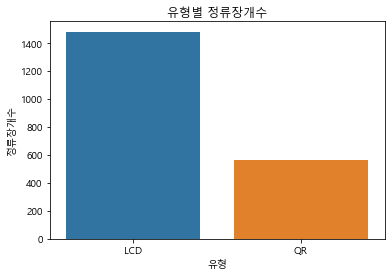

In [32]:
# operationtype별 정거장개수(shopnumber로 카운팅)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    create view shoptype as select distinct operationtype, shopnumber from mergeview

"""
cursor.execute(sql)

cursor = remote.cursor(buffered = True)
sql = """
    select operationtype, count(*) as cnt from shoptype group by operationtype

"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['유형', '정류장개수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))
plt.title('유형별 정류장개수')
sns.barplot(data=data, x='유형', y='정류장개수')
plt.show()

In [39]:
remote.close()

+----------+--------------+
| 지역구   |   정류장개수 |
|----------+--------------|
| 마포구   |           96 |
| 서대문구 |           74 |
| 영등포구 |          106 |
| 동작구   |           60 |
| 중구     |           65 |
| 종로구   |           95 |
| 광진구   |           72 |
| 성동구   |           75 |
| 동대문구 |           68 |
| 양천구   |           80 |
| 용산구   |           60 |
| 은평구   |           77 |
| 강동구   |           83 |
| 강서구   |          123 |
| 송파구   |          132 |
| 성북구   |           73 |
| 중랑구   |           69 |
| 강북구   |           53 |
| 노원구   |           86 |
| 도봉구   |           56 |
| 금천구   |           55 |
| 구로구   |           86 |
| 관악구   |           65 |
| 서초구   |          119 |
| 강남구   |          117 |
+----------+--------------+


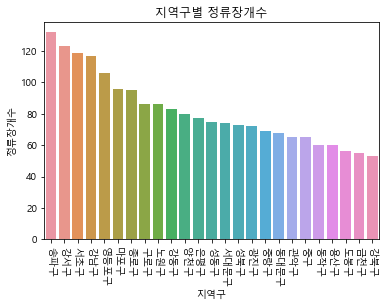

In [40]:
# 구별 정류장 개수 (shopnumber로 카운팅)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    create view gushop as select distinct gu, shopnumber from mergeview

"""
cursor.execute(sql)

cursor = remote.cursor(buffered = True)
sql = """
    select gu, count(*) as cnt from gushop group by gu

"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['지역구', '정류장개수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))
tmp = data.pivot_table(index='지역구', values='정류장개수').sort_values(by='정류장개수', ascending=False)
plt.title('지역구별 정류장개수')
plt.xticks(rotation = -90)
sns.barplot(data=tmp, x=tmp.index, y='정류장개수')
plt.show()

+-------------------------------------+------------+
| 정류소                              |   대여횟수 |
|-------------------------------------+------------|
| 뚝섬유원지역 1번출구 앞             |     126871 |
| 여의나루역 1번출구 앞               |     120963 |
| 청계천 생태교실 앞                  |     100038 |
| 봉림교 교통섬                       |      73421 |
| 고속터미널역 8-1번, 8-2번 출구 사이 |      73362 |
| 마포구민체육센터 앞                 |      70393 |
| 롯데월드타워(잠실역2번출구 쪽)      |      67102 |
| 마곡나루역 5번출구 뒤편             |      65863 |
| 건대입구역 사거리(롯데백화점)       |      63493 |
| 신도림역 1번 출구 앞                |      54784 |
+-------------------------------------+------------+


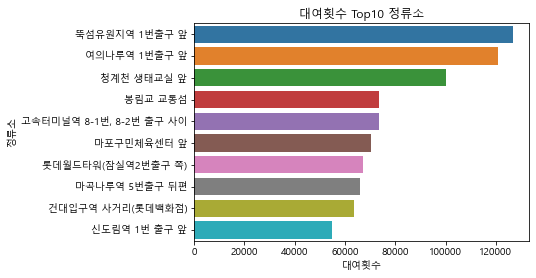

In [43]:
# 1년간 대여횟수가 가장 많은 정류소 상위 10개
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select shopname, sum(counting) as cnt from mergeview group by shopname order by cnt desc limit 10
"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['정류소', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))
plt.title('대여횟수 Top10 정류소')
sns.barplot(data=data, x='대여횟수', y='정류소', orient='h')
plt.show()

+--------+------------------+
|   월별 |         대여횟수 |
|--------+------------------|
|      7 |      1.82659e+06 |
|      8 |      1.80742e+06 |
|      9 |      1.85886e+06 |
|     10 |      2.19675e+06 |
|     11 |      1.38725e+06 |
|     12 | 799581           |
|      1 | 726104           |
|      2 | 701343           |
|      3 |      1.42613e+06 |
|      4 |      2.01490e+06 |
|      5 |      2.32104e+06 |
|      6 |      2.59646e+06 |
+--------+------------------+


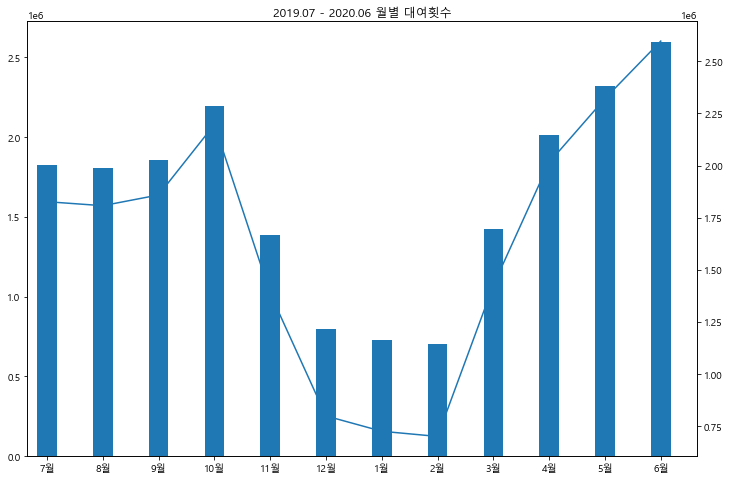

In [53]:
# 월별 대여횟수(counting 으로 집계) (바 차트&선 그래프)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select month, sum(counting) as cnt from mergeview group by month
"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['월별', '대여횟수'])
data = data.astype({'대여횟수': 'int'})
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))


width = .35
data['대여횟수'].plot(kind='bar', width= width, figsize=(12, 8))
data['대여횟수'].plot(secondary_y=True)

ax = plt.gca()
plt.xlim([-width, len(data['대여횟수'])-width])
ax.set_xticklabels(('7월', '8월', '9월', '10월', '11월', '12월', '1월', '2월', '3월', '4월', '5월', '6월'))
plt.title('2019.07 - 2020.06 월별 대여횟수')
plt.show()

+----------+------------------+
| 지역구   |         대여횟수 |
|----------+------------------|
| 영등포구 |      1.65806e+06 |
| 송파구   |      1.64007e+06 |
| 강서구   |      1.36766e+06 |
| 마포구   |      1.32795e+06 |
| 광진구   |      1.11582e+06 |
| 노원구   | 978580           |
| 성동구   | 966881           |
| 서초구   | 848963           |
| 강남구   | 771561           |
| 종로구   | 760738           |
| 강동구   | 746065           |
| 구로구   | 730648           |
| 동대문구 | 695104           |
| 관악구   | 658235           |
| 양천구   | 657375           |
| 성북구   | 647924           |
| 은평구   | 583220           |
| 서대문구 | 565736           |
| 중랑구   | 539119           |
| 동작구   | 499871           |
| 중구     | 445055           |
| 용산구   | 433001           |
| 강북구   | 363547           |
| 도봉구   | 348915           |
| 금천구   | 312326           |
+----------+------------------+


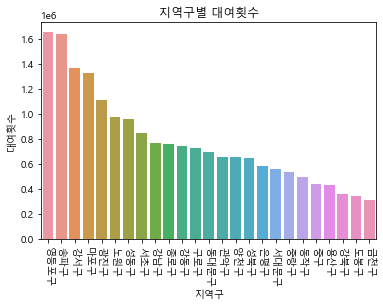

In [54]:
# 지역구별 대여횟수
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select gu, sum(counting) as cnt from mergeview group by gu order by cnt desc
"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['지역구', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))
plt.title('지역구별 대여횟수')
plt.xticks(rotation = -90)
sns.barplot(data=data, x='지역구', y='대여횟수')
plt.show()

+--------------+------------------+
| 구분코드     |         대여횟수 |
|--------------+------------------|
| 정기         |      1.50414e+07 |
| 일일(회원)   |      4.00966e+06 |
| 일일(비회원) | 372759           |
| 단체         | 237993           |
+--------------+------------------+


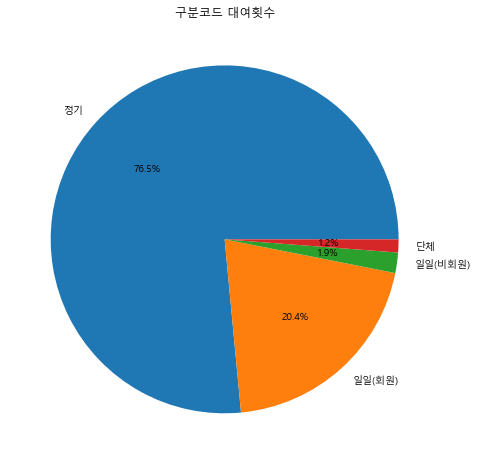

In [56]:
# 구분코드별 대여횟수 (파이차트)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select divisioncode, sum(counting) as cnt from mergeview group by divisioncode order by cnt desc limit 4
"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['구분코드', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
plt.title('구분코드 대여횟수')
plt.pie(data['대여횟수'], labels=data['구분코드'], autopct='%1.1f%%')
plt.show()

+--------+-------------+
| 성별   |    대여횟수 |
|--------+-------------|
| N      | 1.11213e+07 |
| F      | 3.26069e+06 |
| M      | 5.28044e+06 |
+--------+-------------+


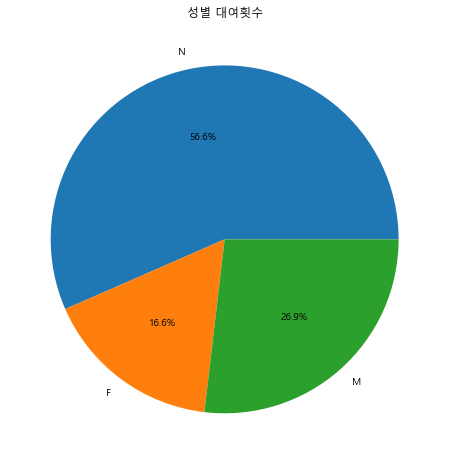

In [57]:
# 성별 대여횟수 (파이 차트)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select sex, sum(counting) as cnt from mergeview group by sex
"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['성별', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))

fig = plt.figure(figsize=(8, 8))
fig.set_facecolor('white')
plt.title('성별 대여횟수')
plt.pie(data['대여횟수'], labels=data['성별'], autopct='%1.1f%%')
plt.show()

+----------+------------------+
| 나이대   |         대여횟수 |
|----------+------------------|
| AGE_001  | 958879           |
| AGE_002  |      9.09039e+06 |
| AGE_003  |      4.43798e+06 |
| AGE_004  |      2.71926e+06 |
| AGE_005  |      1.48172e+06 |
| AGE_006  | 374059           |
| AGE_007  |  77564           |
| AGE_008  | 522559           |
+----------+------------------+


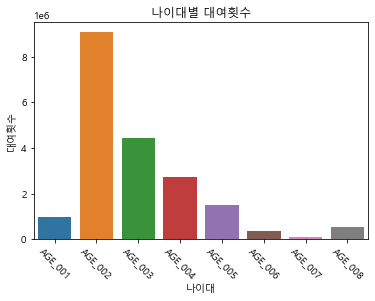

In [59]:
# 나이대별 대여횟수
# sql 쿼리문과 python 코드를 동시에 수행해서 코드짜기가 간편함(정렬 이슈)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select agecode, sum(counting) as cnt from mergeview group by agecode order by agecode

"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['나이대', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))

plt.title('나이대별 대여횟수')
plt.xticks(rotation = -45)
sns.barplot(data=data, x='나이대', y='대여횟수')
plt.show()

+----------+----------------+
| 나이대   |   평균이동거리 |
|----------+----------------|
| AGE_002  |       352030   |
| AGE_003  |       197900   |
| AGE_004  |       134691   |
| AGE_005  |        88875.8 |
| AGE_008  |        73937.4 |
| AGE_001  |        63592.5 |
| AGE_006  |        38897.8 |
| AGE_007  |        16675.6 |
+----------+----------------+


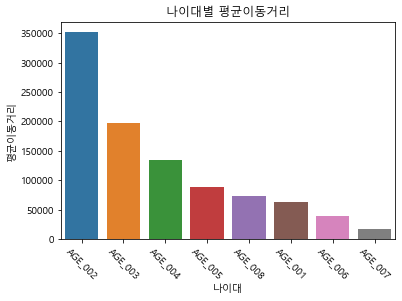

In [60]:
# 나이대별 평균 움직인 거리
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select agecode, avg(distance) from mergeview group by agecode order by avg(distance) desc

"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['나이대', '평균이동거리'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))

plt.title('나이대별 평균이동거리')
plt.xticks(rotation = -45)
sns.barplot(data=data, x='나이대', y='평균이동거리')
plt.show()

+----------+--------+------------------+
| 나이대   | 성별   |         대여횟수 |
|----------+--------+------------------|
| AGE_001  | F      |  72975           |
| AGE_001  | M      | 114758           |
| AGE_001  | N      | 771146           |
| AGE_002  | F      |      1.72412e+06 |
| AGE_002  | M      |      1.96276e+06 |
| AGE_002  | N      |      5.40352e+06 |
| AGE_003  | F      | 827981           |
| AGE_003  | M      |      1.5108e+06  |
| AGE_003  | N      |      2.0992e+06  |
| AGE_004  | F      | 373776           |
| AGE_004  | M      | 988252           |
| AGE_004  | N      |      1.35723e+06 |
| AGE_005  | F      | 195513           |
| AGE_005  | M      | 524627           |
| AGE_005  | N      | 761585           |
| AGE_006  | F      |  37076           |
| AGE_006  | M      | 145268           |
| AGE_006  | N      | 191715           |
| AGE_007  | F      |  24054           |
| AGE_007  | M      |  27954           |
| AGE_007  | N      |  25556           |
| AGE_008  | F      |   5

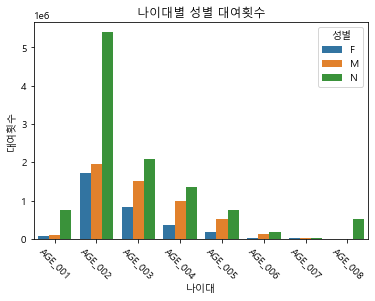

In [63]:
# 나이대별 성별 대여횟수 (counting으로 집계) (hue 사용)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select agecode, sex, sum(counting) as cnt from mergeview group by agecode, sex order by agecode

"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['나이대', '성별', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))

plt.title('나이대별 성별 대여횟수')
plt.xticks(rotation = -45)
sns.barplot(data=data, x='나이대', y='대여횟수', hue='성별')
plt.show()

+--------------+------------+
| 구분코드     |   대여횟수 |
|--------------+------------|
| 일일(비회원) |     364206 |
| 정기         |      98788 |
| 일일(회원)   |      45222 |
| 단체         |       2998 |
| BIL_021      |        114 |
+--------------+------------+


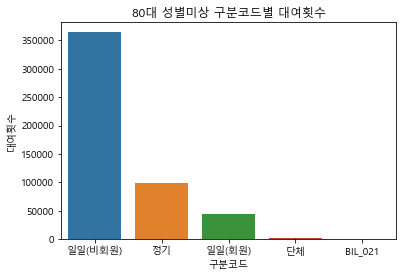

In [64]:
# 80대 성별없음 상세 조회(구분 코드별 분석)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select divisioncode, sum(counting) as cnt from mergeview where (agecode='AGE_008' and sex='N') group by divisioncode

"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['구분코드', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))

plt.title('80대 성별미상 구분코드별 대여횟수')
sns.barplot(data=data, x='구분코드', y='대여횟수')
plt.show()

In [66]:
# 80대 성별없음 상세 조회(지역구별 분석)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select gu, sum(counting) as cnt from mergeview where (agecode='AGE_008' and sex='N') group by gu order by cnt desc

"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['지역구', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))



+----------+------------+
| 지역구   |   대여횟수 |
|----------+------------|
| 영등포구 |      51848 |
| 송파구   |      46476 |
| 마포구   |      37589 |
| 강서구   |      30440 |
| 광진구   |      29948 |
| 성동구   |      28096 |
| 서초구   |      27404 |
| 강남구   |      21032 |
| 노원구   |      20506 |
| 구로구   |      18956 |
| 강동구   |      18328 |
| 종로구   |      17045 |
| 관악구   |      15871 |
| 양천구   |      15613 |
| 성북구   |      15332 |
| 용산구   |      15014 |
| 동작구   |      14721 |
| 동대문구 |      14187 |
| 은평구   |      13473 |
| 서대문구 |      12808 |
| 중랑구   |      11615 |
| 중구     |      10618 |
| 강북구   |       8545 |
| 도봉구   |       8089 |
| 금천구   |       7774 |
+----------+------------+


In [68]:
# 80대 성별없음 상세 조회(월별 분석)
remote = mysql.connector.connect(
    host = '',
    port = 3306,
    user = 'admin',
    password = '',
    database = 'seoul_rentalbicycle'
)

cursor = remote.cursor(buffered = True)
sql = """
    select month, sum(counting) as cnt from mergeview where (agecode='AGE_008' and sex='N') group by month order by cnt desc

"""
cursor.execute(sql)

result = cursor.fetchall()

data = pd.DataFrame(result, columns=['월별', '대여횟수'])
print(tabulate(data, headers='keys', tablefmt='psql', showindex=False))

+--------+------------+
|   월별 |   대여횟수 |
|--------+------------|
|     10 |      80396 |
|      9 |      65992 |
|      8 |      55688 |
|      5 |      50113 |
|      4 |      46851 |
|      6 |      42850 |
|      7 |      42535 |
|      3 |      40638 |
|     11 |      37897 |
|     12 |      16879 |
|      2 |      16235 |
|      1 |      15254 |
+--------+------------+
